In [2]:
import pandas as pd
from collections import Counter
import pprint
import pickle

def dump(obj,filename):
    filehandler = open(filename,"wb")
    pickle.dump(obj,filehandler)
    filehandler.close()

def load(filename):
    file = open(filename,'rb')
    obj = pickle.load(file)
    file.close()
    return obj

In [4]:
from collections import Counter
def get_most_common(df, colname):
    count_dict = Counter(df[colname])
    return count_dict.most_common(100)

#### Load data

In [3]:
df = load('../dumps/df_sel_entities_sentiment_category.pkl')
print(df.shape)
print(type(df))

(18340, 19)
<class 'pandas.core.frame.DataFrame'>


#### Comparison between entities
#### 1) extract entities
#### 2) Identify common entities
#### 3) map from common entities to indexes

In [5]:
df_pepsi = df[df['Category']=='Pepsi']
df_coke = df[df['Category']=='Coke']
cokeEntitySet = set([]);
pepsiEntitySet = set([]);

for entry in df_coke.loc[:,'entities']:
    temp = entry.split("_")
    for t in temp:
        cokeEntitySet.add(str(t))
for entry in df_pepsi.loc[:,'entities']:
    temp = entry.split("_")
    for t in temp:
        pepsiEntitySet.add(str(t))

commonEntitySet = list(cokeEntitySet.intersection(pepsiEntitySet))
print(commonEntitySet)

['', 'the international congress of nutrition', 'dr pepper snapple', 'united nation', 'anheuser busch', 'baskin robbins', 'lucky', 'senate', 'huge', 'the associated press', 'microsoft', 'verizon', 'procter gamble', 'bank of america', 'toyota', 'aha', 'ddb', 'chobani', 'hp', 'treasury', 'tm', 'kendall jenner', 'week', 'leeds', 'email', 'latest news', 'gatorade', 'ups', 'nature', 'walmart', 'bridgestone', 'fda', 'new york times', 'hq', 'gap', 'britvic', 'guardian', 'monarch airlines', 'uae', 'nascar', 'hiv', 'read', 'png', 'run the jewels', 'target', 'the new york', 'instagram', 'nbc', 'isis', 'white', 'insider', 'the trump administration', 'philips', 'google alerts', 'super bowl', 'hotel', 'nsrgy', 'glaxosmithkline', 'the national football league', 'mtv', 'costco', 'playboy', 'facebook', 'mcdonalds', 'daily mail', 'quaker oats', 'pinterest opens', 'imo', 'fmcg', 'cbs', 'boeing', 'interpublic group', 'usa technologies inc', 'malone', 'bloomberg news', 'wells fargo', 'nfl', 'state', 'tiff

In [6]:
df2 = df.loc[:,'entities']
df2.head()
list2 = list(df2)
print(list2[:5])

['elise amendola_file ap_the associated press_mobile apps file_pepsi_3q_pepsico inc_file ap photo_pepsico inc', 'elise amendola_file ap_the associated press_mobile apps file_pepsi_3q_pepsico inc_file ap photo_pepsico inc', 'stellar novellas_coca cola_executive creative director ashley sword_chrysler_stellar scholars_stellar romance_roundtable_the district of columbia_mcdonald', 'crisps_coca cola_walkers', 'coca cola_instagram']


In [7]:
container = []
for i in list2:
    i = i.split("_")
    container.extend(i)

In [8]:
from collections import Counter
def get_most_common(lista):
    count_dict = Counter(lista)
    return count_dict

countDict = get_most_common(container)
commonEntityDict = {};

for entity in commonEntitySet:
    commonEntityDict[entity]=countDict[entity]
print(commonEntityDict)

{'': 2223, 'the international congress of nutrition': 3, 'dr pepper snapple': 10, 'united nation': 6, 'anheuser busch': 19, 'baskin robbins': 5, 'lucky': 4, 'senate': 34, 'huge': 4, 'the associated press': 49, 'microsoft': 81, 'verizon': 21, 'procter gamble': 62, 'bank of america': 14, 'toyota': 47, 'aha': 4, 'ddb': 11, 'chobani': 6, 'hp': 12, 'treasury': 6, 'tm': 2, 'kendall jenner': 44, 'week': 14, 'leeds': 12, 'email': 17, 'latest news': 4, 'gatorade': 82, 'ups': 18, 'nature': 19, 'walmart': 52, 'bridgestone': 20, 'fda': 8, 'new york times': 5, 'hq': 13, 'gap': 3, 'britvic': 4, 'guardian': 42, 'monarch airlines': 9, 'uae': 12, 'nascar': 118, 'hiv': 126, 'read': 3, 'png': 4, 'run the jewels': 5, 'target': 129, 'the new york': 8, 'instagram': 25, 'nbc': 66, 'isis': 7, 'white': 3, 'insider': 3, 'the trump administration': 9, 'philips': 4, 'google alerts': 7, 'super bowl': 32, 'hotel': 5, 'nsrgy': 6, 'glaxosmithkline': 2, 'the national football league': 7, 'mtv': 7, 'costco': 77, 'playb

In [9]:
commonEntityDict['']=0
mostCommonEntities = Counter(commonEntityDict).most_common(20)
entList = [];
for ent, count in mostCommonEntities:
    entList.append(ent)
print(mostCommonEntities)
print(entList)

[('mcdonald', 247), ('united', 242), ('nestle', 191), ('nfl', 187), ('converse', 182), ('ap', 174), ('nyse', 162), ('fortune', 142), ('kfc', 140), ('apple', 131), ('target', 129), ('hiv', 126), ('ap photo', 124), ('mountain dew', 123), ('nike', 122), ('nascar', 118), ('pep', 117), ('diet', 116), ('wells fargo', 114), ('dc', 97)]
['mcdonald', 'united', 'nestle', 'nfl', 'converse', 'ap', 'nyse', 'fortune', 'kfc', 'apple', 'target', 'hiv', 'ap photo', 'mountain dew', 'nike', 'nascar', 'pep', 'diet', 'wells fargo', 'dc']


In [10]:
#just for mcdonald

#pepsi rows: df_pepsi
aveSentList = [];
for targetEnt in entList:
    i=0;
    sentSum=0;
    for index, row in df_pepsi.iterrows():
        ent = row['entities'].split("_")
        for e in ent:
            #break if any of the entities match the popular entity list
            if e == targetEnt:
                sentSum = sentSum+ row['Sentiment']
                i = i+1
                break
    aveSentList.append([targetEnt,{'Pepsi': sentSum/i, 'Coke': 0}])
print(aveSentList)
#coke rows: df_coke

[['mcdonald', {'Pepsi': 0.031808092352437804, 'Coke': 0}], ['united', {'Pepsi': -0.15664136360734623, 'Coke': 0}], ['nestle', {'Pepsi': 0.008261780886148151, 'Coke': 0}], ['nfl', {'Pepsi': -0.03815534700706887, 'Coke': 0}], ['converse', {'Pepsi': -0.006211951108817243, 'Coke': 0}], ['ap', {'Pepsi': 0.20272885273072055, 'Coke': 0}], ['nyse', {'Pepsi': 0.15874048692945655, 'Coke': 0}], ['fortune', {'Pepsi': -0.6052242690421319, 'Coke': 0}], ['kfc', {'Pepsi': -0.00352277615807601, 'Coke': 0}], ['apple', {'Pepsi': 0.1399248359313378, 'Coke': 0}], ['target', {'Pepsi': -0.005153109743862468, 'Coke': 0}], ['hiv', {'Pepsi': -0.006211951108817243, 'Coke': 0}], ['ap photo', {'Pepsi': 0.23594945580907292, 'Coke': 0}], ['mountain dew', {'Pepsi': 0.13884394871220332, 'Coke': 0}], ['nike', {'Pepsi': 0.014274008981658317, 'Coke': 0}], ['nascar', {'Pepsi': 0.10557087478798001, 'Coke': 0}], ['pep', {'Pepsi': 0.1325424854277911, 'Coke': 0}], ['diet', {'Pepsi': 0.055044777110252144, 'Coke': 0}], ['wells 

In [11]:
for targetEnt in entList:
    i=0;
    sentSum=0;
    for index, row in df_coke.iterrows():
        ent = row['entities'].split("_")
        for e in ent:
            #break if any of the entities match the popular entity list
            if e == targetEnt:
                sentSum = sentSum+ row['Sentiment']
                i = i+1
                break
    aveSentList[entList.index(targetEnt)][1]['Coke'] = sentSum/i
print(aveSentList)

[['mcdonald', {'Pepsi': 0.031808092352437804, 'Coke': 0.12915549480362135}], ['united', {'Pepsi': -0.15664136360734623, 'Coke': 0.31013945056375586}], ['nestle', {'Pepsi': 0.008261780886148151, 'Coke': 0.19462679701615768}], ['nfl', {'Pepsi': -0.03815534700706887, 'Coke': 0.0739626595276451}], ['converse', {'Pepsi': -0.006211951108817243, 'Coke': -0.10705785088683253}], ['ap', {'Pepsi': 0.20272885273072055, 'Coke': 0.19317312258217856}], ['nyse', {'Pepsi': 0.15874048692945655, 'Coke': 0.16239140284462986}], ['fortune', {'Pepsi': -0.6052242690421319, 'Coke': 0.08133439484348032}], ['kfc', {'Pepsi': -0.00352277615807601, 'Coke': 0.2971728989142875}], ['apple', {'Pepsi': 0.1399248359313378, 'Coke': 0.2704280091519825}], ['target', {'Pepsi': -0.005153109743862468, 'Coke': 0.3694420812267417}], ['hiv', {'Pepsi': -0.006211951108817243, 'Coke': 0.08603403962249301}], ['ap photo', {'Pepsi': 0.23594945580907292, 'Coke': 0.11902978094970079}], ['mountain dew', {'Pepsi': 0.13884394871220332, 'Cok

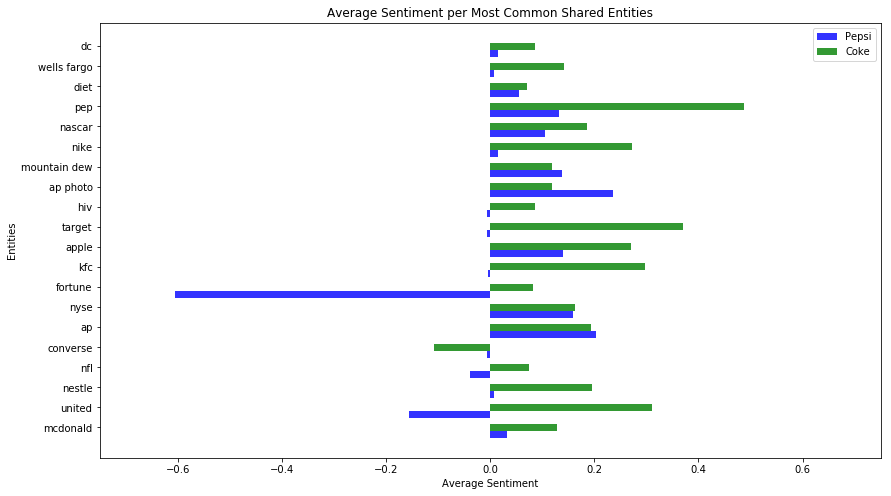

In [17]:
import numpy as np
import matplotlib.pyplot as plt
pepsi=[];
coke=[];
for i in range(0,20):
    pepsi.append(aveSentList[i][1]['Pepsi'])
    coke.append(aveSentList[i][1]['Coke'])

index = np.arange(20)
bar_width = 0.35
opacity = 0.8

plt.figure(1, figsize=(14, 8))
rect1= plt.barh(index,pepsi,bar_width,alpha=opacity,color='b',label='Pepsi')
rect2 = plt.barh(index+bar_width,coke,bar_width,alpha=opacity,color='g',label='Coke')
plt.xlim([-0.75,0.75])
plt.yticks(index+bar_width,entList)
plt.ylabel('Entities')
plt.xlabel('Average Sentiment')
plt.title('Average Sentiment per Most Common Shared Entities')
plt.legend()
plt.show()